In [ ]:
!pip install opencv-python-headless
!pip install yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.9/885.9 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 8.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=

In [ ]:
import cv2
import torch
from google.colab.patches import cv2_imshow
import numpy as np


In [ ]:

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-11-13 Python-3.10.12 torch-2.5.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 69.3MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]


Saving city.jpg to city.jpg


## Now, start with the heatmap thing

In [ ]:
from transformers import pipeline
from PIL import Image

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

In [ ]:
image = Image.open('/content/city.jpg')
depth_mapping = pipe(image)

In [ ]:
%matplotlib inline

In [ ]:
print(depth_mapping["predicted_depth"])


tensor([[2.54906, 2.54959, 2.55292,  ..., 2.61254, 2.62138, 2.46078],
        [2.57028, 2.57248, 2.54945,  ..., 2.60828, 2.63661, 2.64369],
        [2.56963, 2.55875, 2.54482,  ..., 2.60668, 2.62236, 2.63262],
        ...,
        [5.30827, 5.30028, 5.29544,  ..., 5.33634, 5.33674, 5.35957],
        [5.41595, 5.41740, 5.40190,  ..., 5.44077, 5.44364, 5.45904],
        [5.50450, 5.50120, 5.51708,  ..., 5.56677, 5.59148, 5.58952]])


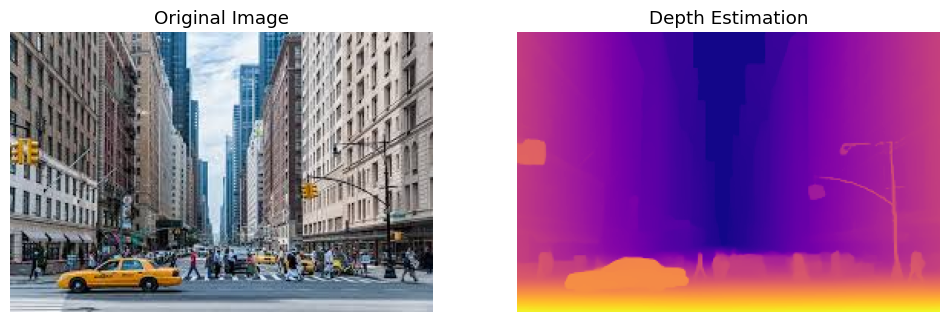

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Show the depth map
plt.subplot(1, 2, 2)
plt.imshow(depth_mapping["depth"], cmap='plasma')  # cmap='plasma' gives a nice color map for depth
plt.title("Depth Estimation")
plt.axis("off")

plt.show()

## Depth map from the mapping values


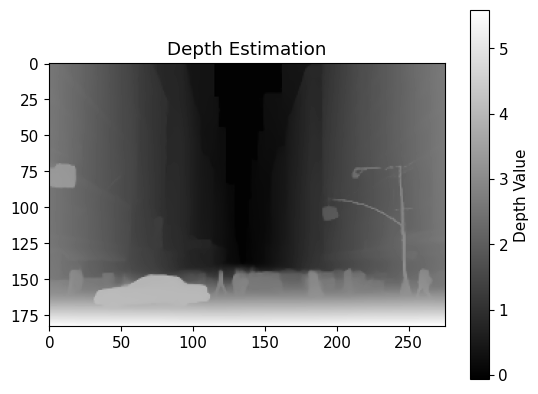

In [ ]:
import matplotlib.pyplot as plt
import torch

# Display the depth map
plt.imshow(depth_mapping["predicted_depth"].cpu().numpy(), cmap='gray')
plt.colorbar(label='Depth Value')
plt.title("Depth Estimation")
plt.show()


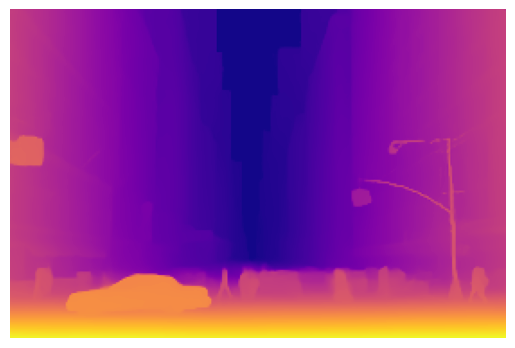

In [ ]:
focal_length = 35 # get as input, in mm
scaling_factor = 0.1


real_world_distance = depth_mapping["predicted_depth"].cpu().numpy() * scaling_factor
real_world_distance = (real_world_distance - np.min(real_world_distance)) / (np.max(real_world_distance) - np.min(real_world_distance))

import matplotlib.pyplot as plt

plt.imshow(real_world_distance, cmap='plasma')
# plt.colorbar(label='Distance (m)')
# plt.title("Approximate Real-World Distance Map")
plt.axis('off')
plt.show()

# plt.savefig('colored_depth_map.jpg', bbox_inches='tight', pad_inches=0)


Depth value at the center of the bounding box: 0.7240938544273376


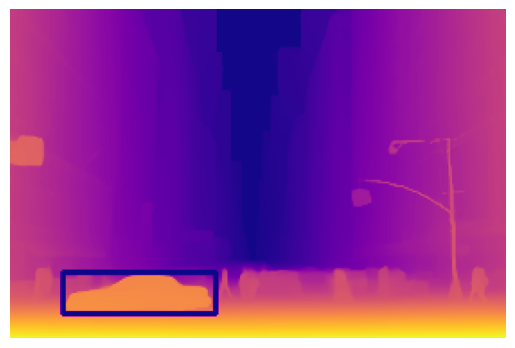

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming `image` is the original input image and `real_world_distance` is the heatmap

# Step 1: Get the scaling factors between the input image and the heatmap
height_scale = real_world_distance.shape[0] / image.shape[0]
width_scale = real_world_distance.shape[1] / image.shape[1]

# Step 2: Detect objects and find the bounding box with the largest area (as done previously)

max_area = 0
largest_bbox = None

for box in predicted_boxes:
    x1, y1, x2, y2, confidence, class_id = box  # Unpack the box, confidence, and class_id
    width = x2 - x1
    height = y2 - y1
    area = width * height  # Calculate area

    if area > max_area:
        max_area = area
        largest_bbox = (x1, y1, x2, y2)  # Store the coordinates of the bounding box with the largest area

# Step 3: Scale the bounding box coordinates to the size of the heatmap
if largest_bbox is not None:
    x1, y1, x2, y2 = largest_bbox
    x1_heatmap = int(x1 * width_scale)
    y1_heatmap = int(y1 * height_scale)
    x2_heatmap = int(x2 * width_scale)
    y2_heatmap = int(y2 * height_scale)

    # Step 4: Calculate the center of the bounding box
    center_x = (x1 + x2) // 2
    center_y = (y1 + y2) // 2

    # Step 5: Get the corresponding depth value from the depth map (real_world_distance)
    center_x_heatmap = int(center_x * width_scale)
    center_y_heatmap = int(center_y * height_scale)

    depth_value = real_world_distance[center_y_heatmap, center_x_heatmap]
    print(f"Depth value at the center of the bounding box: {depth_value}")

    # Step 6: Draw the bounding box on the heatmap (optional)
    cv2.rectangle(real_world_distance, (x1_heatmap, y1_heatmap), (x2_heatmap, y2_heatmap), (0, 255, 0), 2)

# Step 7: Display the heatmap with bounding box (optional)
plt.imshow(real_world_distance, cmap='plasma')
plt.axis('off')
plt.show()


Depth at center: 4.025520324707031 meters


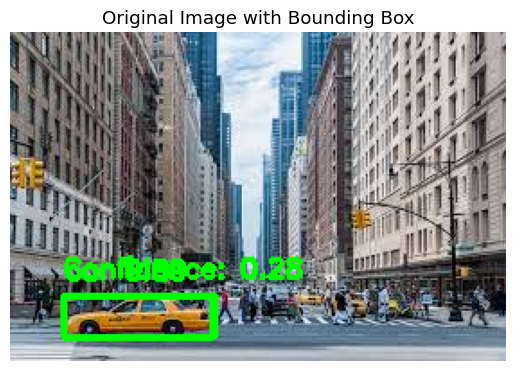

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming `image` is the original input image and `predicted_boxes` contains the detected bounding boxes.

# Step 1: Find the bounding box with the largest area from the predicted boxes
max_area = 0
largest_bbox = None

for box in predicted_boxes:
    x1, y1, x2, y2, confidence, class_id = box  # Unpack the box, confidence, and class_id
    width = x2 - x1
    height = y2 - y1
    area = width * height  # Calculate area

    if area > max_area:
        max_area = area
        largest_bbox = (x1, y1, x2, y2)  # Store the coordinates of the bounding box with the largest area

# Step 2: Draw the bounding box on the original image
if largest_bbox is not None:
    x1, y1, x2, y2 = largest_bbox
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # Convert to integers for OpenCV
    center_x = (x1 + x2) // 2
    center_y = (y1 + y2) // 2

    center_depth = depth_mapping["predicted_depth"][center_y, center_x]
    # Draw the bounding box (green color, 2px thickness)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Optionally, add the label and confidence score (if available)
    cv2.putText(image, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    print(f"Depth at center: {center_depth} meters")
# Step 3: Display the image with the bounding box
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image with Bounding Box")
plt.axis("off")
plt.show()
